## Tips to speed up Python

- [Python is ...](#Python-is-...)
- [Hold on, before trying to speed things up …](#Hold-on,-before-trying-to-speed-things-up-…)
- [So how fast is it and how much memory does it use?](#So-how-fast-is-it-and-how-much-memory-does-it-use?)
- [How fast could it go?](#How-fast-could-it-go?)
- [Potential improvements](#Potential-improvements)
  - [Append to lists, rather than concatenating](#Append-to-lists,-rather-than-concatenating)
  - [Move calculations outside loops (loop-invariant)](#Move-calculations-outside-loops-(loop-invariant))
  - [Use built−in functions (C)](#Use-built−in-functions-(C))
  - [Use suitable/optimal data structures (additional)](#Use-suitable/optimal-data-structures-(additional))
  - [Reduce repeated calculations with caching (memoisation)](#Reduce-repeated-calculations-with-caching-(memoisation))
  - [Use vectorisation instead of loops](#Use-vectorisation-instead-of-loops)
  - [Convert to compiled/static code](#Convert-to-compiled/static-code)
  - [Lazy loading and execution](#Lazy-loading-and-execution)
  - [Parallelise - Single Machine](#Parallelise---Single-Machine)
  - [Parallelise - Multi-threading](#Parallelise---Multi-threading)
  - [Parallelise - Multi-processing](#Parallelise---Multi-processing)
  - [Parallelise - Interactive on HPC](#Parallelise---Interactive-on-HPC)
  - [Parallelise - HPC](#Parallelise---HPC)
  - [GPUs](#GPUs)
- [Recommendations](#Recommendations)

#### Python is ...
- High−level
  - Clean, readable, and efficient API
  - Easy and fun to learn
  - Slow to run
- Dynamic
  - Fast to write and test code
  - Less code
  - Flexible (interactive)
  - No compilation
  - Slow to run
- Great support
  - Open source
  - Vast libraries
  - Huge number of users, including top software companies.

#### Hold on, before trying to speed things up …
- Caution
  - Can optimise too early
  - Trade-offs e.g. complexity, speed, memory, disk, readability, time, effort, etc.

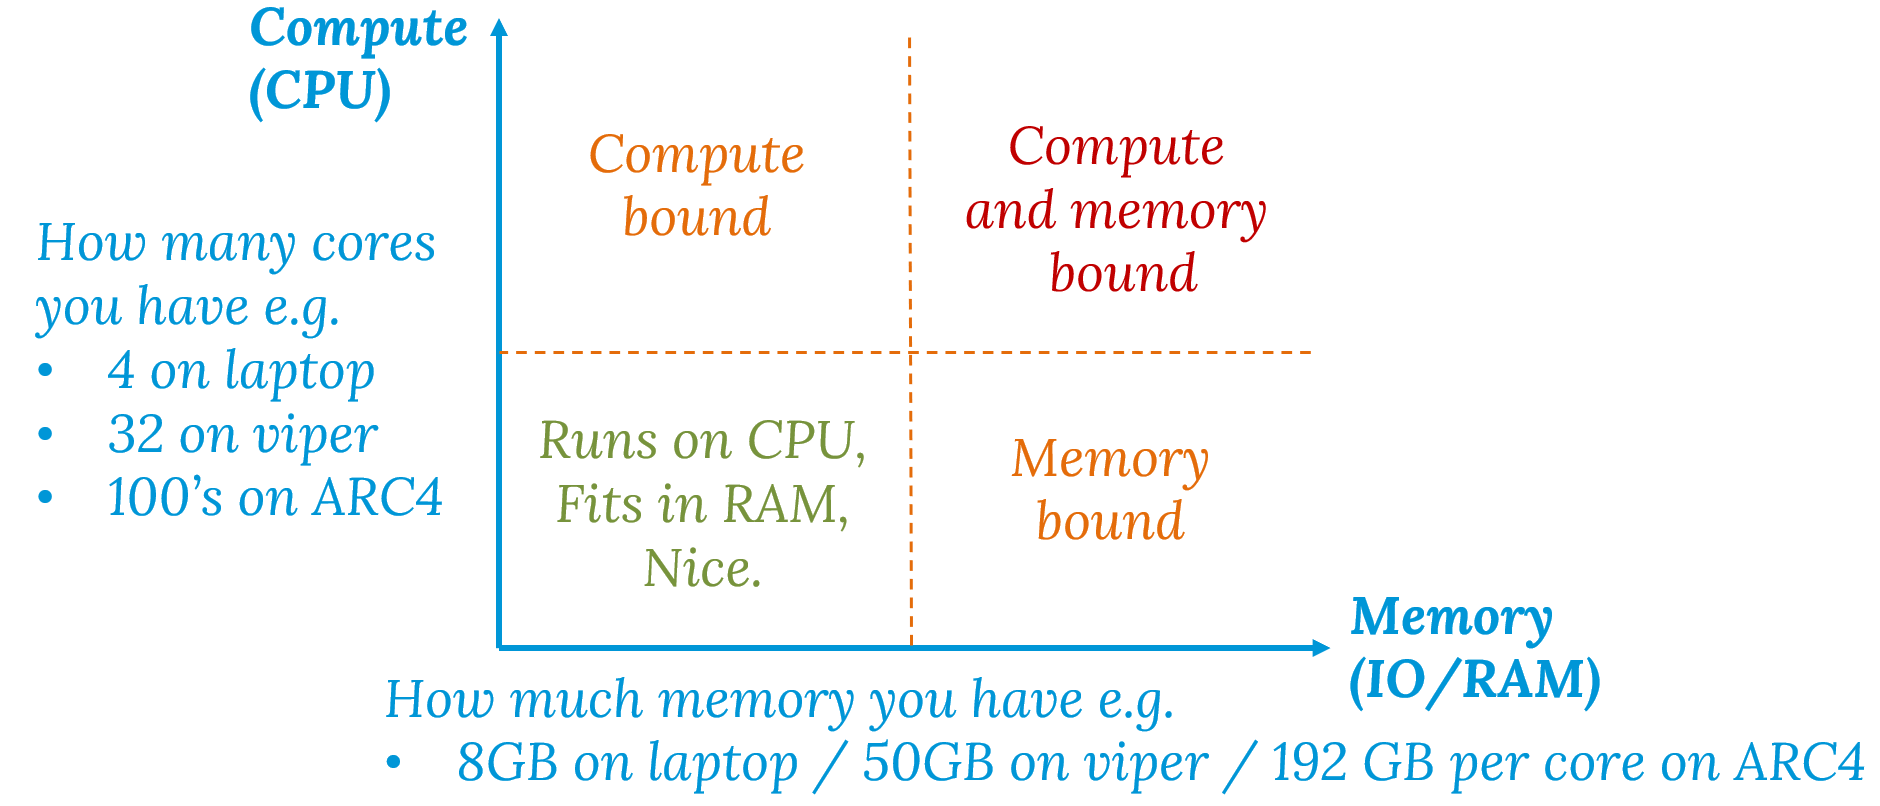

#### So how fast is it and how much memory does it use?
- [Profiling](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)
  - [Speed](https://github.com/pyutils/line_profiler)
    - [IPython magic](https://jakevdp.github.io/PythonDataScienceHandbook/01.03-magic-commands.html) (Jupyter Lab)
      - Line: `%timeit`
      - Cell: `%%timeit`
      - If `pip install line_profiler`:
        - First load module: `%load_ext line_profiler`
        - Scripts: `%prun`
        - Line-by-line: `%lprun`
          - `@profile` decorator around the function
  - [Memory](https://github.com/pythonprofilers/memory_profiler)
    - If `pip install memory_profiler`:
    - First load module:
      - `%load_ext memory_profiler`
      - Line: `%memit`
      - Cell: `%%memit`
      - Line-by-line: `%mprun`

#### How fast could it go?
- Time−space complexity ([Big O notation](https://www.bigocheatsheet.com/))
  - Considers worst-case scenario
  - Ignores constants
  - Constant time = machine operation
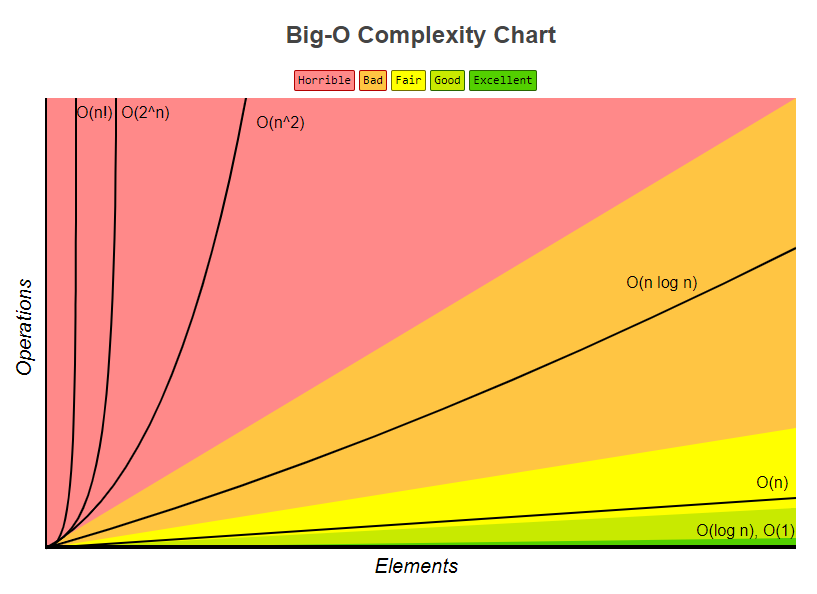

#### Potential improvements

##### Append to lists, rather than concatenating

In [ ]:
%%timeit
my_list = []
for num in range(1_000):
    my_list += [num]

In [ ]:
%%timeit
my_list = []
for num in range(1_000):
    my_list.append(num)

##### Move calculations outside loops (loop-invariant)

In [ ]:
%%timeit
for num in range(1_000_000):
    constant = 500_000
    bigger_num = max(num, constant)

In [ ]:
%%timeit
constant = 500_000
for num in range(1_000_000):
    bigger_num = max(num, constant)

##### Use [built−in functions](https://docs.python.org/3/library/functions.html) (C)

In [ ]:
nums = [num for num in range(1_000_000)]

In [ ]:
%%timeit
count = 0
for num in nums:
    count += 1

In [ ]:
%timeit len(nums)

##### Use suitable/optimal [data structures](https://docs.python.org/3/tutorial/datastructures.html) ([additional](https://docs.python.org/3/library/collections.html))
- e.g. [tuples](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences) (immutable) use less memory (but are slower).

In [ ]:
my_list  = [1, 2, 3]
my_tuple = (1, 2, 3)

In [ ]:
import sys

In [ ]:
sys.getsizeof(my_list)

In [ ]:
sys.getsizeof(my_tuple)

- e.g. [dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) (hash tables, key: value pairs) are faster (but use more memory) (for more see Fluent Python [book](https://www.oreilly.com/library/view/fluent-python/9781491946237/)).

In [ ]:
import numpy as np

In [ ]:
haystack_list = np.random.uniform(low=0, high=100, size=(1_000_000))

In [ ]:
haystack_dict = {key: value for key, value in enumerate(haystack_list)}

In [ ]:
needles = [0.1, 50.1, 99.1]

In [ ]:
%%timeit
needles_found = 0
for needle in needles:
    if needle in haystack_list:
        needles_found += 1

In [ ]:
%%timeit
needles_found = 0
for needle in needles:
    if needle in haystack_dict:
        needles_found += 1

- e.g. [sets](https://docs.python.org/3/tutorial/datastructures.html#sets) for membership.
- e.g. float32 over float64 to use less memory, etc.

##### Reduce repeated calculations with [caching](https://realpython.com/lru-cache-python/) (memoisation)

In [ ]:
def fib(num):
    if num == 0 or num == 1:
        return 0
    elif num == 2:
        return 1
    
    return fib(num - 1) + fib(num - 2)

In [ ]:
%timeit fib(20)

In [ ]:
def fib_with_caching(num, cache={0: 0, 1: 0, 2: 1}):
    if num in cache:
        return cache[num]
    else:
        cache[num] = fib_with_caching(num - 1, cache) + fib_with_caching(num - 2, cache)
        return cache[num]

In [ ]:
%timeit fib_with_caching(20, cache={0: 0, 1: 0, 2: 1})

##### Use [vectorisation](https://jakevdp.github.io/PythonDataScienceHandbook/02.03-computation-on-arrays-ufuncs.html) instead of loops
- Loops type−check and dispatch functions per cycle ([CPython](https://www.python.org/)).
- NumPy [ufuncs](https://numpy.org/doc/stable/reference/ufuncs.html) (static typed and compiled in C).

In [ ]:
nums = np.arange(1_000_000)

In [ ]:
%%timeit
for num in nums:
    num *= 2

In [ ]:
%%timeit
double_nums = np.multiply(nums, 2)

- [Broadcasting](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) (ufuncs over different shaped arrays, [NumPy](https://numpy.org/doc/stable/user/basics.broadcasting.html), [xarray](https://xarray.pydata.org/en/v0.16.2/computation.html?highlight=Broadcasting#broadcasting-by-dimension-name)).

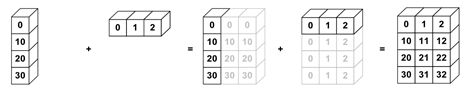

In [ ]:
nums_col = np.array([0, 10, 20, 30]).reshape(4, 1)
nums_row = np.array([0, 1, 2])

In [ ]:
nums_col + nums_row

In [ ]:
import xarray as xr

In [ ]:
nums_col = xr.DataArray([0, 10, 20, 30], [('col', [0, 10, 20, 30])])
nums_row = xr.DataArray([0, 1, 2], [('row', [0, 1, 2])])

In [ ]:
nums_col + nums_row

##### Convert to compiled/static code
- [PyPy](https://www.pypy.org/) (uses just−in−time compiler).
- [Cython](https://cython.org/) (converts Python code to static compiled C code).
- [Numba](http://numba.pydata.org/) (converts Python code to fast machine code, good with NumPy, loops, and broadcasting).

In [ ]:
from numba import njit

In [ ]:
def super_function(nums):
    trace = 0.0
    for num in nums:
        trace += np.cos(num)
    return nums + trace

In [ ]:
nums = np.arange(1_000_000)

In [ ]:
%timeit super_function(nums)

In [ ]:
@njit
def super_function(nums):
    trace = 0.0
    for num in nums:
        trace += np.cos(num)
    return nums + trace

In [ ]:
%timeit super_function(nums)

##### [Lazy loading](https://xarray.pydata.org/en/v0.16.2/dask.html) and [execution](https://tutorial.dask.org/01x_lazy.html)
- [video example for climate data](https://youtu.be/2rgD5AJsAbE).

In [ ]:
xr.tutorial.open_dataset('air_temperature')

In [ ]:
import dask.array as da

In [ ]:
%time
my_array = da.random.random((10_000, 10_000), chunks=(1_000, 1_000))
my_array

In [ ]:
%time
result = my_array + my_array.T
result

In [ ]:
%time result.compute()

##### Parallelise - [Single machine](https://docs.dask.org/en/latest/setup/single-distributed.html)
- In general, either:
  - [shared memory](https://docs.dask.org/en/latest/shared.html) (`-pe smp np` on ARC4) - common framework is OpenMP (Open Multi-Processing)
    - Can be either multi-threading or multi-processing.
  - [message passing interface](https://docs.dask.org/en/latest/setup/hpc.html?highlight=mpi#using-mpi) (`-pe ie np` on ARC4) - common framework is OpenMPI
    - Normally multi-processing.
- [Dask](https://docs.dask.org/en/latest/)
- Viper example using [xarray](http://xarray.pydata.org/en/stable/dask.html)

In [ ]:
from IPython.display import Video

In [ ]:
Video('dask_single_machine.mp4')

In [ ]:
from dask.distributed import Client
client = Client()
client

In [ ]:
ds = xr.open_dataset(
    '/nfs/a68/shared/earlacoa/wrfout_2015_PM_2_DRY_0.25deg.nc',
    chunks={'time': 'auto'}
)

In [ ]:
ds.nbytes * (2 ** -30)

In [ ]:
%time ds_mean = ds.mean()

In [ ]:
%time ds_mean.compute()

In [ ]:
client.close()

##### Parallelise - Multi-threading
- Memory-bound
- e.g. [dask.array](https://examples.dask.org/array.html) (NumPy)

In [ ]:
Video('multi-threading.mp4')

In [ ]:
from dask.distributed import Client
client = Client(
    processes=False,
    threads_per_worker=4,
    n_workers=1
)
client

In [ ]:
import dask.array as da

In [ ]:
my_array = da.random.random((50_000, 50_000), chunks=(5_000, 5_000))
result = my_array + my_array.T
result

In [ ]:
result.compute()

In [ ]:
client.close()

##### Parallelise - Multi-processing
- Multiple processes (cores).
- Compute-bound
- e.g. [dask.dataframe](https://examples.dask.org/dataframe.html) (Pandas)

In [ ]:
Video('multi-processing.mp4')

In [ ]:
from dask.distributed import Client
client = Client()
client

In [ ]:
import dask
import dask.dataframe as dd

In [ ]:
df = dask.datasets.timeseries()
df

In [ ]:
type(df)

In [ ]:
result = df.groupby('name').x.std()
result

In [ ]:
result.visualize()

In [ ]:
result_computed = result.compute()

In [ ]:
type(result_computed)

In [ ]:
client.close()

##### Parallelise - [Interactive on HPC](https://pangeo.io/setup_guides/hpc.html)
- [Dask.bags](https://examples.dask.org/bag.html) (iterator, embarrassingly parallel)
- [video instructions](https://youtu.be/FXsgmwpRExM).

1. Create or edit the `~/.config/dask/jobqueue.yaml` file with that in this directory
2. Also, can check the `~/.config/dask/distributed.yaml` file with that in this directory

In [ ]:
Video("interactive_on_hpc.mp4")

In [ ]:
# in a terminal

# log onto arc4
ssh username@arc4.leeds.ac.uk

# start an interactive session on a compute node on arc4
qlogin -l h_rt=04:00:00 -l h_vmem=12G

# activate your python environment
conda activate my_python_environment

# echo back the ssh command to connect to this compute node
echo "ssh -N -L 5555:`hostname`:5555 -L 5757:`hostname`:5757 username@arc4.leeds.ac.uk"

# launch a jupyter lab session on this compute node
jupyter lab --no-browser --ip=`hostname` --port=5555

In [ ]:
# in a local terminal
# ssh into the compute node
ssh -N -L 5555:`hostname`:5555 -L 5757:`hostname`:5757 username@arc4.leeds.ac.uk

In [ ]:
# open up a local browser (e.g. chrome)
# go to the jupyter lab session by pasting into the url bar
localhost:5555
    
# can also load the dask dashboard in the browser at localhost:5757

In [ ]:
# now the jupyter code
from dask_jobqueue import SGECluster
from dask.distributed import Client

cluster = Client(
    walltime='01:00:00',
    memory='4 G',
    resource_spec='h_vmem=4G',
    scheduler_options={
        'dashboard_address': ':5757',
    },
)

client = Client(cluster)

In [ ]:
cluster.scale(jobs=20)

In [ ]:
client

In [ ]:
import numpy as np
import dask.bag as db

In [ ]:
nums = np.random.randint(low=0, high=100, size=(5_000_000))
nums

In [ ]:
def weird_function(nums):
    return chr(nums)

In [ ]:
bag = db.from_sequence(nums)
bag = bag.map(weird_function)
bag.visualize()

In [ ]:
result = bag.compute()

In [ ]:
client.close()
cluster.close()

##### Parallelise - [HPC](https://docs.dask.org/en/latest/setup/hpc.html)

1. Create/edit the `dask_on_hpc.py` file.
2. Submit to the queue using `qsub dask_on_hpc.bash`.

##### GPUs
- Numerically intense operations
- Not IO bound
- [CuPy](https://cupy.dev/), [parallel](https://docs.dask.org/en/latest/gpu.html), [ARC4](https://arcdocs.leeds.ac.uk/systems/arc4.html#using-the-v100-gpu-nodes).

In [ ]:
import cupy as cp

In [ ]:
x = cp.arange(6).reshape(2, 3).astype('f')
x

In [ ]:
x.sum(axis=1)

##### Recommendations
- Profile your code to find what takes up the most time / memory.
  - IPython cell magic: `%%timeit` and `%%memit`
- Use the optimal data structures for your problem.
- Use broadcasting (instead of loops where can).
- Lazy loading and running.
- Use Dask
  - Under the hood for many libraries e.g. xarray, iris, scikit-learn.
  - Swap out for Numpy arrays or Pandas DataFrames.
  - Use embarrassingly parallel code.
- Use interactively via Jupyter Lab on a HPC.
- Use libraries that build on each other ([Pangeo](https://pangeo.io/index.html)).

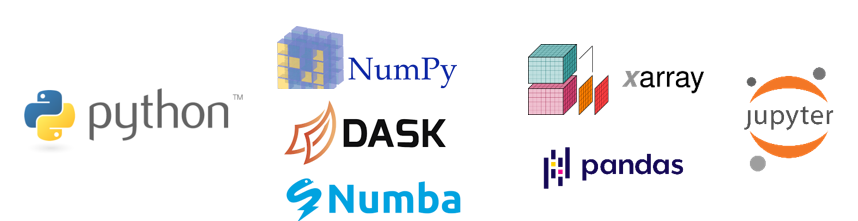